<a href="https://colab.research.google.com/github/Thanchanokning/229352/blob/main/Copy_of_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [6]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

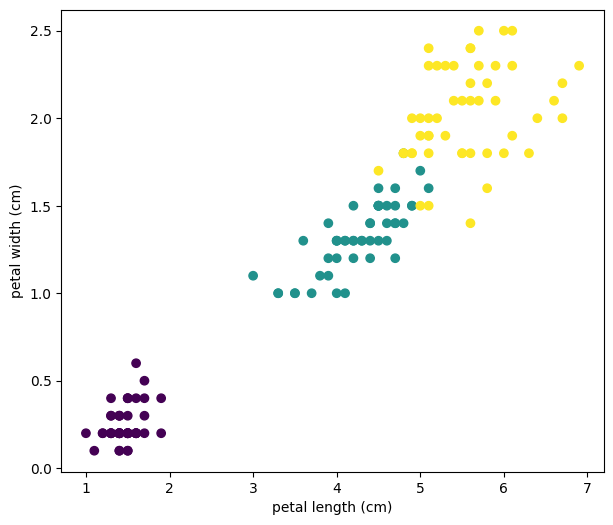

In [7]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [8]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [9]:
#TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(X_train.shape, X_test.shape)

(105, 2) (45, 2)


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

C = 0.01


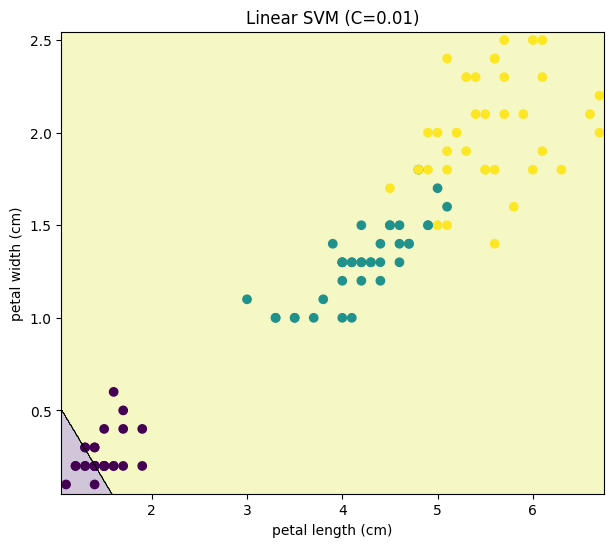

C = 0.1


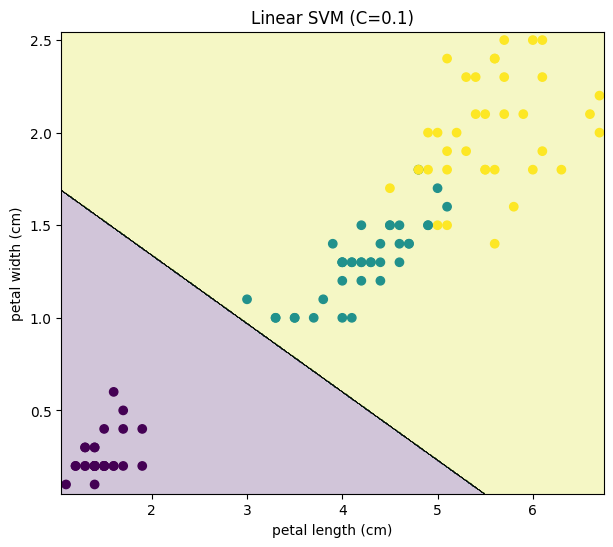

C = 1.0


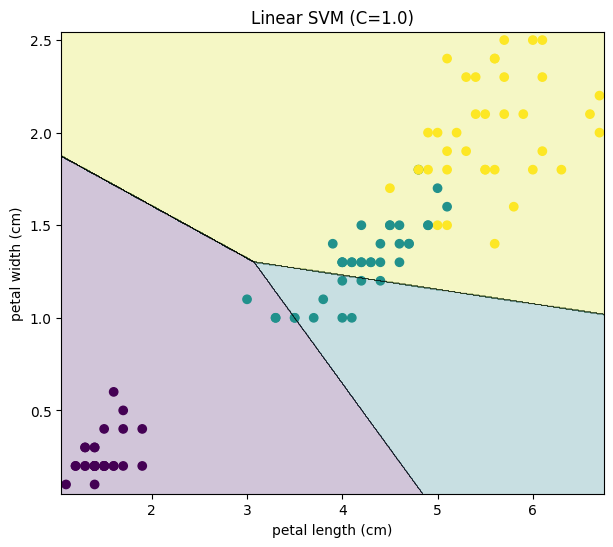

C = 10.0


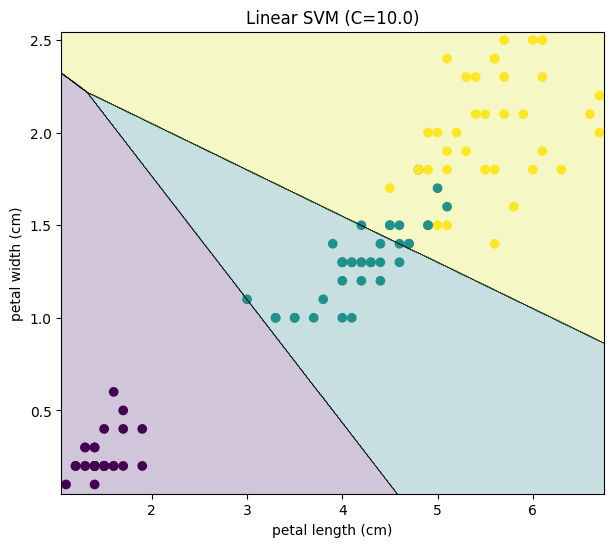

C = 100.0


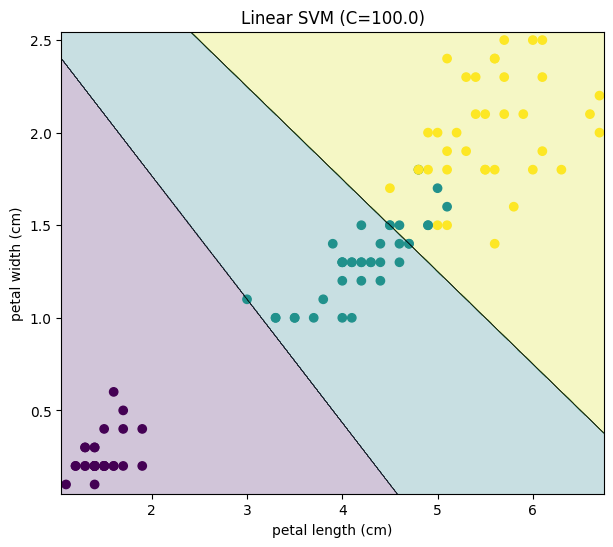

In [10]:
#TODO
Cs = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in Cs:
    clf = LinearSVC(C=C, loss='hinge', max_iter=100000)
    clf.fit(X_train, y_train)

    print(f"C = {C}")
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f"Linear SVM (C={C})")
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

gamma = 0.01


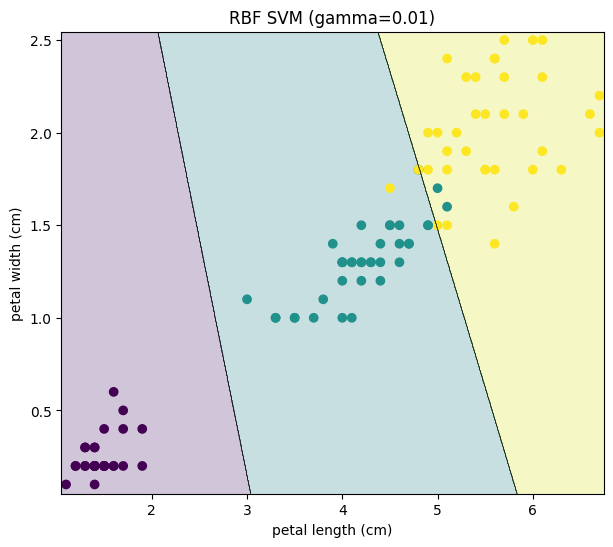

gamma = 0.1


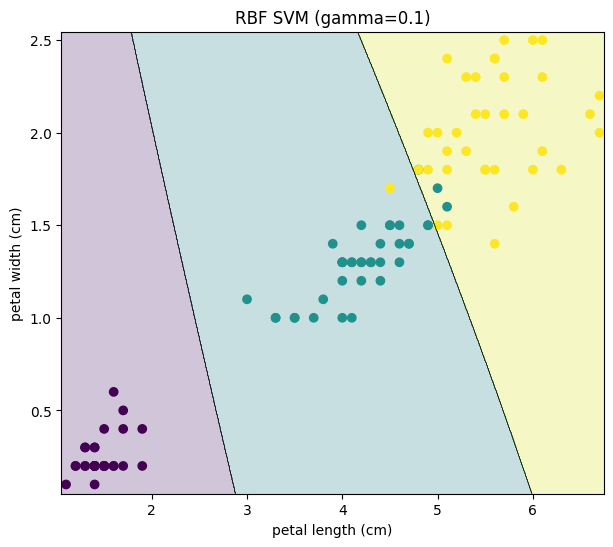

gamma = 1.0


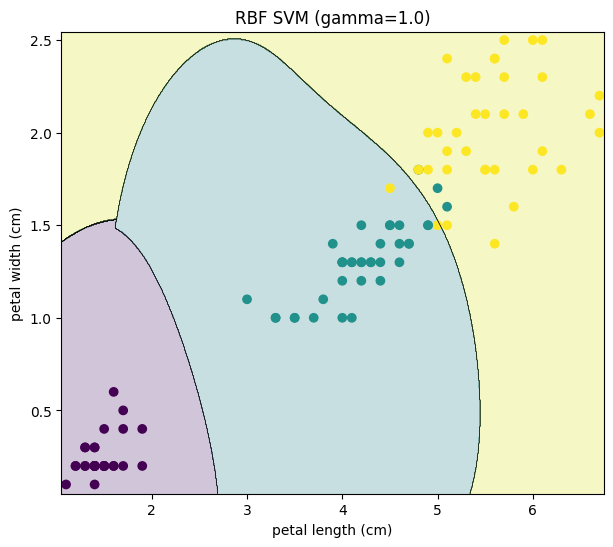

gamma = 10.0


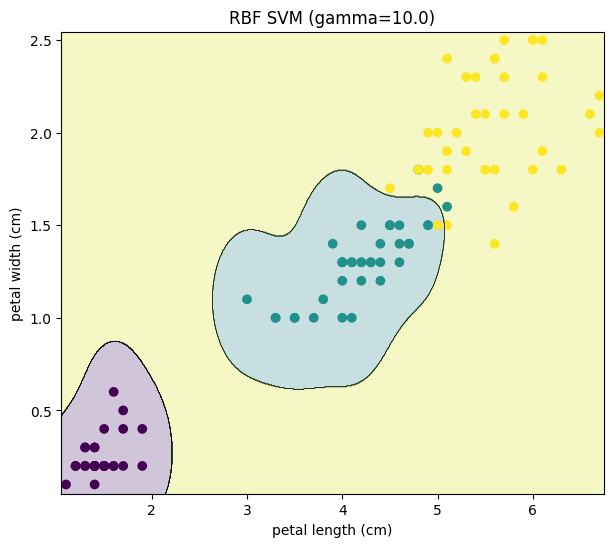

gamma = 100.0


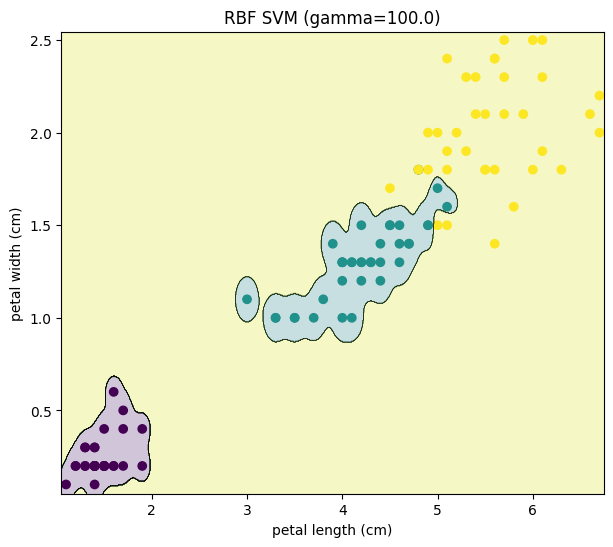

In [12]:
#TODO
gammas = [0.01, 0.1, 1.0, 10.0, 100.0]

for g in gammas:
    clf = SVC(kernel='rbf', C=1.0, gamma=g, max_iter=100000)
    clf.fit(X_train, y_train)

    print(f"gamma = {g}")
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f"RBF SVM (gamma={g})")
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [13]:
#TODO
clf = SVC(kernel='rbf', C=1.0, gamma=0.1)
clf.fit(X_train, y_train)

test_accuracy = clf.score(X_test, y_test)
test_error = 1 - test_accuracy
n_support = clf.n_support_.sum()

print("Test accuracy:", test_accuracy)
print("Test error:", test_error)
print("Number of support vectors:", n_support)

Test accuracy: 1.0
Test error: 0.0
Number of support vectors: 41


Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?

1.Explain using test accuracy

2.Explaing using decision boundary plot

In [14]:
#TODO
#Linear SVM ที่เลือกมา ได้ค่า Test-Accuracy เท่ากับ 0.755
#Kernel SVM ที่เลือกมา ได้ค่า Test-Accuracy เท่ากับ 1.0
#สรุปได้ว่า Kernel SVM มีค่าสูงกว่า Linear SVM เเละทำนายได้เเม่นยำกว่า

#พิจารณาจากกราฟ Decision Boundary Plot ตัวแบบที่สามารถจำแนกข้อมูล Iris data ของ Linear SVM จะเป็นเส้นตรง เเต่ Kernel SVMจะไม่เป็นเส้นตรงจะโค้ง
#กราฟ Decision Boundary Plot ตัวแบบที่สามารถจำแนกข้อมูล Iris data ได้ดีกว่า คือ SVC เนื่องจากมีข้อมูลที่แบ่งกลุ่มผิดน้อยว่าตัวแบบ SVM
